In [4]:
pip install pandas scikit-learn matplotlib


                                              0.0/11.6 MB ? eta -:--:--
                                              0.0/11.6 MB 1.3 MB/s eta 0:00:10
                                              0.1/11.6 MB 1.3 MB/s eta 0:00:09
                                              0.2/11.6 MB 1.5 MB/s eta 0:00:08
     -                                        0.3/11.6 MB 1.7 MB/s eta 0:00:07
     -                                        0.4/11.6 MB 1.8 MB/s eta 0:00:07
     --                                       0.6/11.6 MB 2.3 MB/s eta 0:00:05
     --                                       0.8/11.6 MB 2.6 MB/s eta 0:00:05
     ---                                      0.9/11.6 MB 2.8 MB/s eta 0:00:04
     ---                                      0.9/11.6 MB 2.8 MB/s eta 0:00:04
     ----                                     1.2/11.6 MB 2.6 MB/s eta 0:00:05
     -----                                    1.5/11.6 MB 3.1 MB/s eta 0:00:04
     ------                                   1.9/11.6 MB 3


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean Squared Error: 0.03
R-squared: 0.88


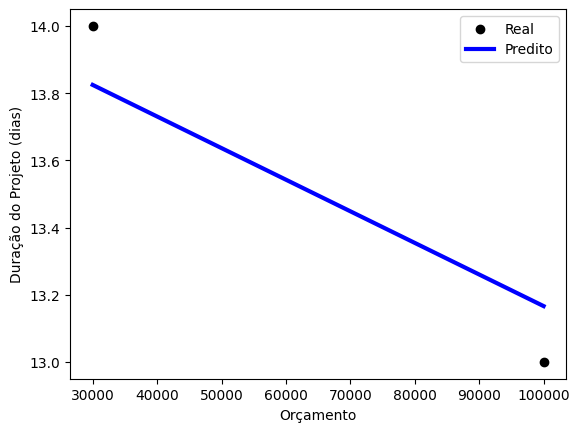

In [10]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Conectar-se ao banco de dados existente
conn = sqlite3.connect('empresa.db')  # Substitua 'seu_banco_de_dados.db' pelo nome real do seu banco

# Ler dados do banco de dados para um DataFrame
query = '''
    SELECT P.orcamento, E.inicio, E.termino_estimado
    FROM Projeto P
    JOIN Etapa E ON P.id = E.id_projeto
'''
df = pd.read_sql_query(query, conn)

# Fechar a conexão
conn.close()

# Pré-processamento dos dados
df['inicio'] = pd.to_datetime(df['inicio'])
df['termino_estimado'] = pd.to_datetime(df['termino_estimado'])
df['duracao'] = (df['termino_estimado'] - df['inicio']).dt.days

# Dividir os dados em conjunto de treinamento e teste
X = df[['orcamento']]
y = df['duracao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir métricas de desempenho
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plotar resultados
plt.scatter(X_test, y_test, color='black', label='Real')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predito')
plt.xlabel('Orçamento')
plt.ylabel('Duração do Projeto (dias)')
plt.legend()
plt.show()
